In [1]:
from glob import glob 
import pandas as pd 
import numpy as np 
import json 
import os 

In [2]:
dirs = sorted(glob('./Save_models/*'))
dirs = pd.Series(dirs)[pd.Series(dirs).apply(lambda x : 'MVtecAD' not in x)].values
aug_name = pd.Series(dirs).apply(lambda x : x.split('/')[-1]).values

In [18]:

AUROC = [] 
ROC = [] 
METRIC = []
roc = [] 
Machine_METRIC = [] 
auroc = [] 
for dir,name in zip(dirs,aug_name):
    try:
        with open (sorted(glob(os.path.join(dir,'*')))[0],'rb') as f:
            data = json.load(f)
        [fpr,tpr,_] = data['auto']['roc']
        [acc,pre,rec,f1] = data['auto']['metric']

        AUROC.append(data['auto']['auroc'])
        ROC.append([fpr,tpr])
        METRIC.append([acc,pre,rec,f1])

        Machine_METRIC.append(data['machine']['metric'])
        roc.append(data['machine']['roc'])
        auroc.append(data['machine']['auroc'])

    except:
        pass
ROC = np.array(ROC)    
AUROC = np.array(AUROC)
METRIC = np.array(METRIC)
Machine_METRIC = np.array(Machine_METRIC)
auroc = np.array(auroc)
roc = np.array(roc)

/tmp/ipykernel_22190/3961555365.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ROC = np.array(ROC)
/tmp/ipykernel_22190/3961555365.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  roc = np.array(roc)


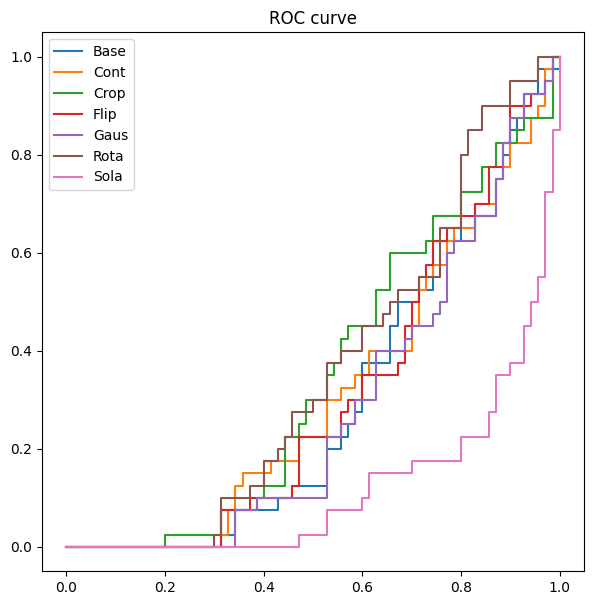

In [13]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(7,7))
plt.title('ROC curve')
for (fpr,tpr),name in zip(ROC,aug_name):
    plt.plot(fpr,tpr,label=name)
plt.legend()
plt.show()    

In [11]:
auto_metric = pd.DataFrame(np.c_[METRIC,AUROC])
auto_metric.columns = ['Accuracy','Precision','Recall','F1-score','AUROC']
auto_metric = auto_metric.rename(index={key:value for key,value in enumerate(aug_name)})
auto_metric

,Accuracy,Precision,Recall,F1-score,AUROC
Base,0.636364,0.788462,0.585714,0.672131,0.2979
Cont,0.581818,0.815789,0.442857,0.574074,0.3125
Crop,0.509091,0.944444,0.242857,0.386364,0.3504
Flip,0.618182,0.804348,0.528571,0.637931,0.3089
Gaus,0.627273,0.822222,0.528571,0.643478,0.2854
Rota,0.600000,0.696970,0.657143,0.676471,0.3604
Sola,0.527273,1.000000,0.257143,0.409091,0.1200


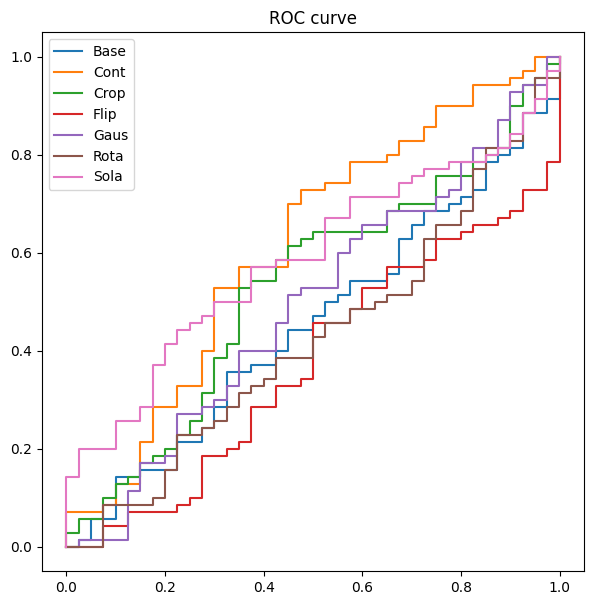

In [19]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(7,7))
plt.title('ROC curve')
for (fpr,tpr,_),name in zip(roc,aug_name):
    plt.plot(fpr,tpr,label=name)
plt.legend()
plt.show()    

In [22]:
machine_metric = pd.DataFrame(np.c_[Machine_METRIC,auroc])
machine_metric.columns = ['Accuracy','Precision','Recall','F1-score','Auroc']
machine_metric = machine_metric.rename(index={key:value for key,value in enumerate(aug_name)})
machine_metric

,Accuracy,Precision,Recall,F1-score,Auroc
Base,0.490909,0.616667,0.528571,0.569231,0.4536
Cont,0.463636,0.720000,0.257143,0.378947,0.6129
Crop,0.536364,0.633803,0.642857,0.638298,0.5304
Flip,0.463636,0.587302,0.528571,0.556391,0.3736
Gaus,0.563636,0.648649,0.685714,0.666667,0.4936
Rota,0.436364,0.562500,0.514286,0.537313,0.4257
Sola,0.490909,0.750000,0.300000,0.428571,0.5879
